## **GEOG/ESO 230: Reading and writing different types of binary files**

In [1]:
!git clone https://github.com/atkinsonde/230_spring_2024_archive.git
# remember to click the "refresh" button to see the folder appear on the left

Cloning into '230_spring_2024_archive'...
remote: Enumerating objects: 168, done.
remote: Counting objects: 100% (168/168), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 168 (delta 52), reused 117 (delta 29), pack-reused 0 (from 0)
Receiving objects: 100% (168/168), 25.69 MiB | 11.00 MiB/s, done.
Resolving deltas: 100% (52/52), done.


In [14]:
dir = r"230_spring_2024_archive/binary_class_material/"

## Part 1: open a binary file for writing, reading

In [15]:
#######  PART 1
fn = "test.b"

with open(dir+fn, "wb") as file:
    # byte format - recall the ASCII table
    byte_data = b"\x59\x56\x69\x63\x0D\x0A" # let's make something up ** NOTE THE b to indicate this string is binary encoded
    file.write(byte_data)

### You must explicitly close the file!! This is true anytime you use open()
### the with statement automatically closes the file

# Have a look at what we wrote:
with open(dir+fn,"rb") as file:
    zz=file.read()
    print(zz)

## Part 2: write integers in binary form

In [ ]:
#######  PART 2 write integers in binary form
## why do this? less storage space, faster access

import array

fn = "test_num.bin"
vals = [10,20,30,40,50]
data = array.array("B", vals)

with open(dir+fn, "wb") as file:
    file.write(data.tobytes())

with open(dir+fn,"rb") as file:
    zz  = file.read()
    zzn = [x for x in zz]
    print(zzn)


##  Part 3: write integers as strings in binary form

In [ ]:
#######  PART 3 write integers as strings in binary form
fn = "test_num_B.bin"
vals = ["10", "20", "30", "40", "50"]
#vals_b = [x.encode('utf-8') for x in vals ]

with open(dir+fn, "wb") as file:
    [file.write(x.encode('utf-8')) for x in vals]

with open(dir+fn,"rb") as file:
    zz=file.read()
    print(zzn)


## Part 4: Read an "HDF" file (hierarchical data format)

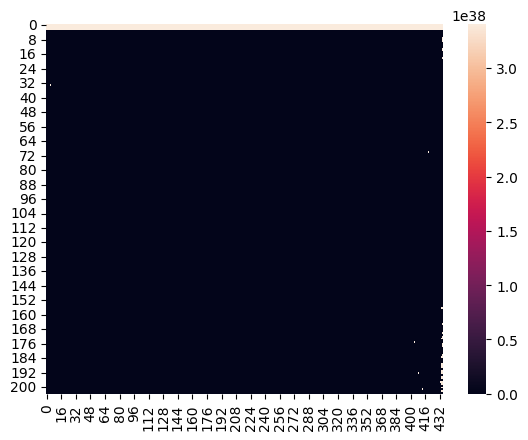

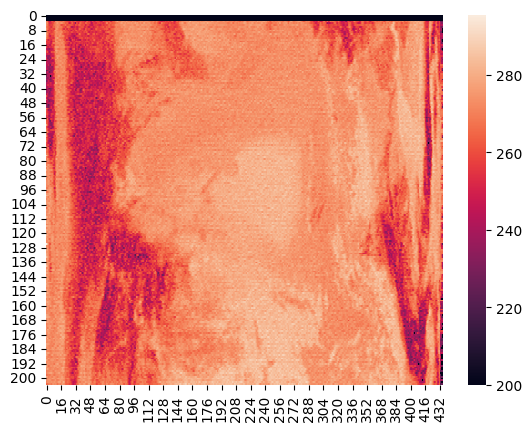

In [29]:
#######  PART 4  HDF read
import h5py
import pandas as pd
import numpy as np

dir_n = r"230_spring_2024_archive/binary_class_material/nimbus_hdf/"
fn    = "NmHRIR1H.19660823_01-50-12_1332_002.hdf.xml"
nimbus_meta = pd.read_xml(dir_n+fn)
nimbus_meta.iloc[2,:]

fn = "NmHRIR1H.19660823_01-50-12_1332_002.hdf"

f = h5py.File(dir_n+fn, 'r')

f.keys()
f['Sat Longitude']

ds = np.array(f['HRIR-Temp']) # creates a numpy array from an HDF dataset
ds.shape
ds.dtype
ds[100,100]

#let's make a quick "heatmap" plot using some other python libraries:
from matplotlib import pyplot as plt
import seaborn as sns
sns.heatmap(ds)
plt.show()
# it seems there are some huge values in the set which are wrecking the plot

# we need to remove them using a conditional:
dsf = np.where(ds<350,ds,200)
sns.heatmap(dsf)
plt.show()


## Part 5: read a "netCDF" file (NETwork Common Data Format)

In [24]:
# !pip install netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 63.5 MB/s eta 0:00:00


In [30]:
import netCDF4 as nc

dir_nc =  r"230_spring_2024_archive/binary_class_material/netCDF/"
fn     = "vwnd.10m.1979.nc"

ds     = nc.Dataset(dir_nc+fn)
print(ds)

print(ds.variables.keys()) # get all variable names
ds['vwnd']
t1 = ds['vwnd'][0,:,:]

t1 = np.where(t1>-100,t1,-50)
sns.heatmap(t1)
plt.show()

t2 = ds['vwnd'][:,90,100]
pd.DataFrame(t2).plot()


OSError: [Errno -101] NetCDF: HDF error: '230_spring_2024_archive/binary_class_material/netCDF/vwnd.10m.1979.nc'

##  PART 6  Grib read

In [ ]:
fn = "CMC_hrdps_west_TMP_TGL_2_ps2.5km_2020031312_P000-00.grib2"

import xarray as xr
ds = xr.load_dataset(dir_nc+fn, engine='cfgrib')
import cfgrib